# Project Ensemble techniques - Term Deposit Sale
**Author: Pablo Ulises Hernandez Garces**

**link Github: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG**

## Objective
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Resources Available
The historical data for this project is available in file.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Attribute information

*Bank client data:*
1. age:Continuous feature 
2. job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status(married, single, divorced)
4. education:education level (primary, secondary, tertiary)
5. default: has credit in default? 
6. housing: has housing loan? 
7. loan: has personal loan?
8. balance in account

*Related to previous contact:*

9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

*Other attributes:*

13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

*Output variable (desired target):*

17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Steps and tasks
Libraries required and data

In [1]:
# Libraries required
import pandas as pd                                             # library for working with dataframes
import numpy as np                                              # library for working with arrays
import matplotlib.pyplot as plt                                 # low level visualization library
%matplotlib inline
import seaborn as sns                                           # higher level visualization library compared to matplotlib

from sklearn.model_selection import train_test_split #split the data into train and test
from sklearn import preprocessing # for standardizarion

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics #see the error parameters
import statsmodels.api as sm


# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

data = pd.read_csv('bank-full.csv')

### Exploratory data quality report
**1. Univariate analysis(12marks)**
    * Univariate analysis –data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
    * Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
    * Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [24]:
# Univariate analysis. Checking data types, number of unique values, statistics, missing values and outliers
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


From above output, apparentely, there are not missing values. This has to be verified by reviewing the values of each variable, looking for a possible error in the data (inconsistent data, error in capturing data, etc.).

Additionally, we have numeric and object variables. The object variables correspond to categorical data.

In [25]:
# are there duplicated rows?
print("Number of duplicated rows:")
print(data[data.duplicated()].shape[0])

# number of unique values in each variable
data.nunique()

Number of duplicated rows:
0


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

We have verified that there are not duplicated rows in the data set. Also, we can see the number of unique values of each variable.

In [26]:
# unique values
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital
['married' 'single' 'divorced']

education
['tertiary' 'secondary' 'unknown' 'primary']

default
['no' 'yes']

balance
[ 2143    29     2 ...  8205 14204 16353]

housing
['yes' 'no']

loan
['no' 'yes']

contact
['unknown' 'cellular' 'telephone']

day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration
[ 261  151   76 ... 1298 1246 1556]

campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31

Based on the unique values of each variable, it seems that there are no missing values like errors in data capture or inconsistence data. Except for the previous variable that has a value of 275 meanwhile the other values are at most of 58. 

In [27]:
# checking how many rows have the value 275 in previous variable
aux=data.previous==275
print("Number of observations with value 275 in the previous variable:",aux.sum())

Number of observations with value 275 in the previous variable: 1


Due to there is only one observation with the value of 275 we can drop it or impute it. I will impute it with the mean (without the 275 observation) rounded to the nearest integer.

In [28]:
data.loc[data.previous==275,"previous"] = round(data.previous[data.previous!=275].mean(),0)
data.previous.unique()

array([ 0.,  3.,  1.,  4.,  2., 11., 16.,  6.,  5., 10., 12.,  7., 18.,
        9., 21.,  8., 14., 15., 26., 37., 13., 25., 20., 27., 17., 23.,
       38., 29., 24., 51., 22., 19., 30., 58., 28., 32., 40., 55., 35.,
       41.])

In [29]:
#Now let's check basic statistics of the numeric variables.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.574263,1.907907,0.0,0.0,0.0,0.0,58.0


From the above summary we can see that balance, duration and pday have highly right skewed distribution. The rest of variables seem to be almost simetrical or with a low skewness. Let's see their distributions.

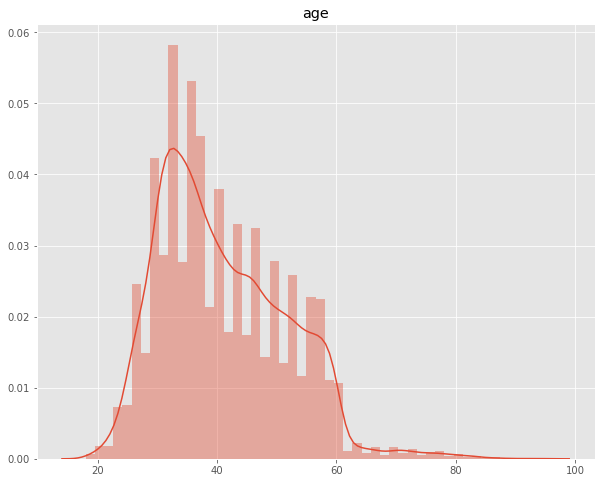

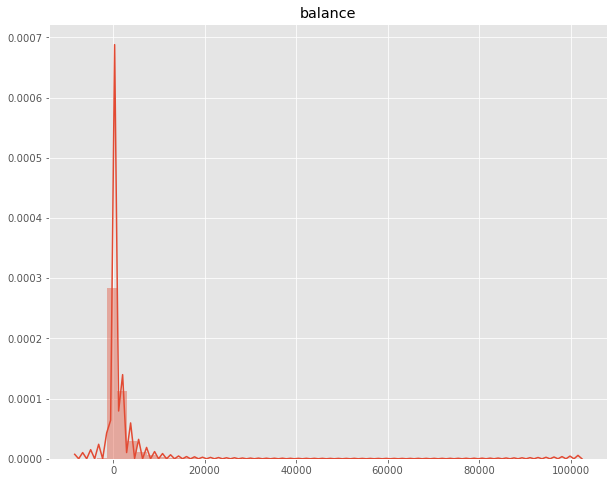

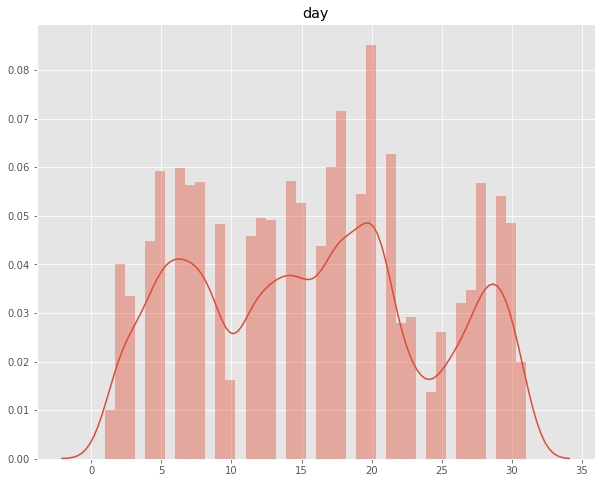

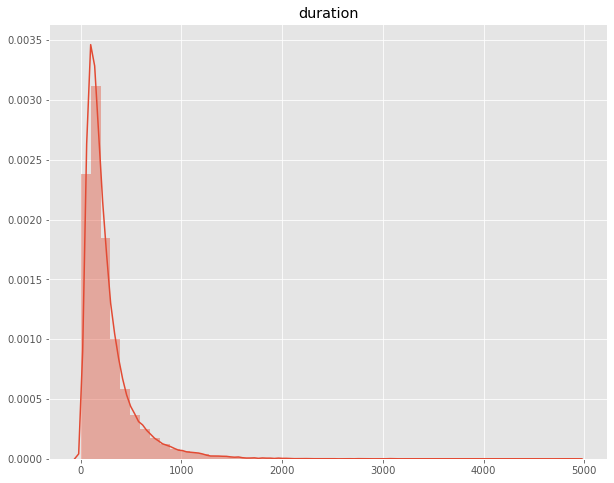

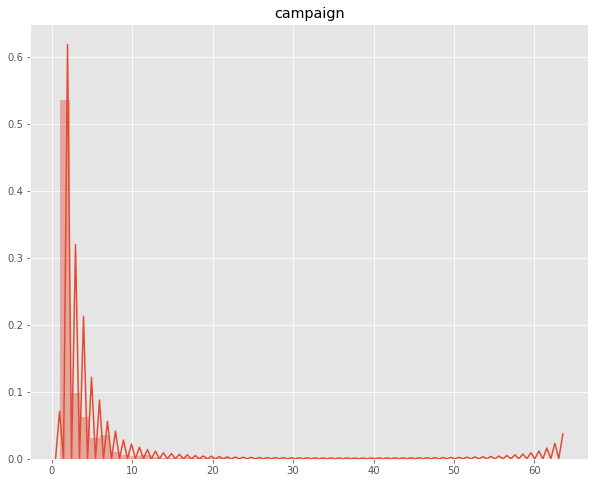

C:\Users\amiel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


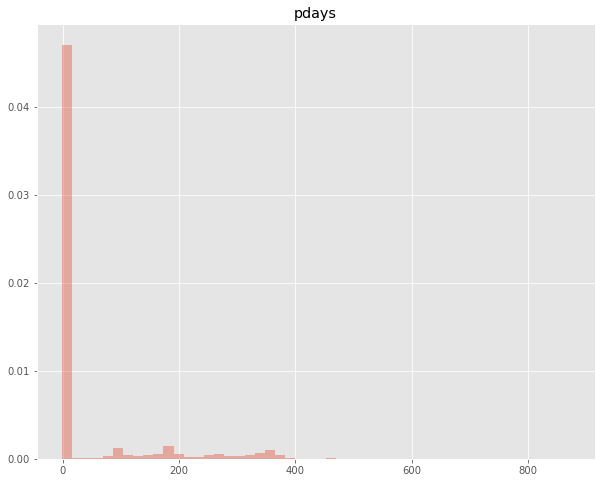

In [30]:
# Univariate plots
cont_var = data.columns[data.dtypes=="int64"]
discrete_var = data.columns[data.dtypes=="object"]

# plots for continous variables
for i in cont_var:
    sns.distplot(data[[i]],kde=True)
    plt.title(i)
    plt.show()



From the graphs of the continous variables we can confirm the right skewness of most of the variables, in some of them it is small but in others is really high. Additionally, the day variable seems to be multimodal with 3 modes.

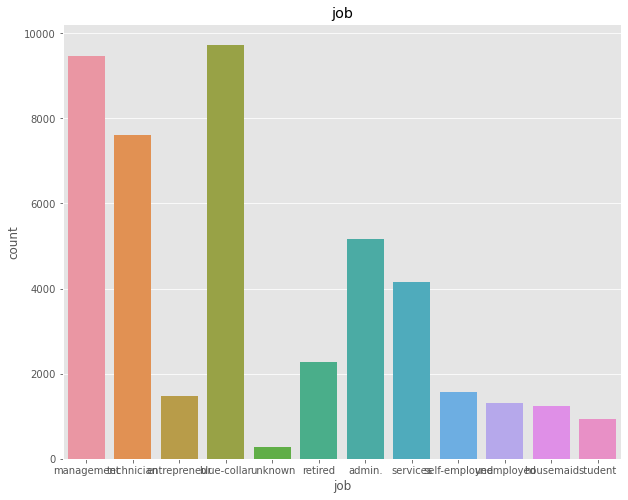

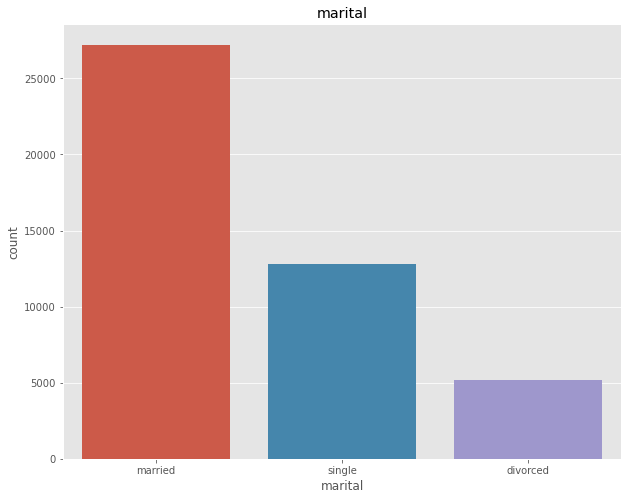

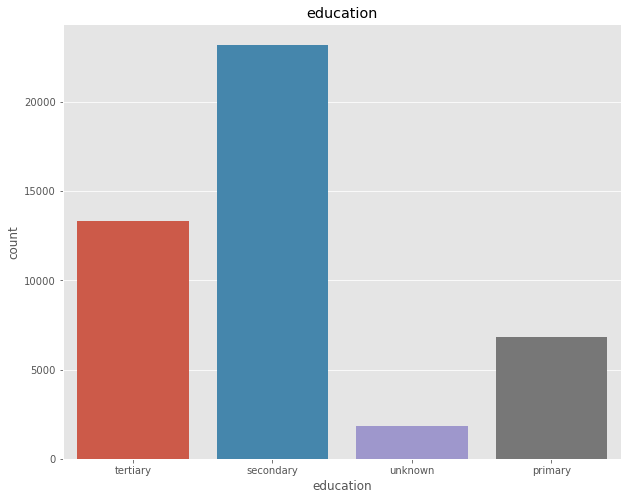

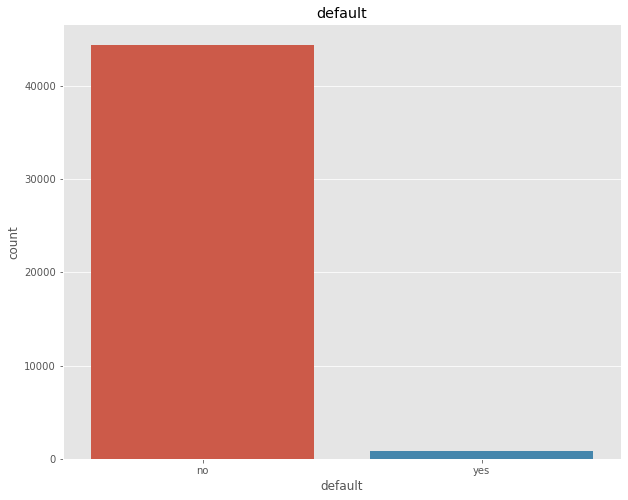

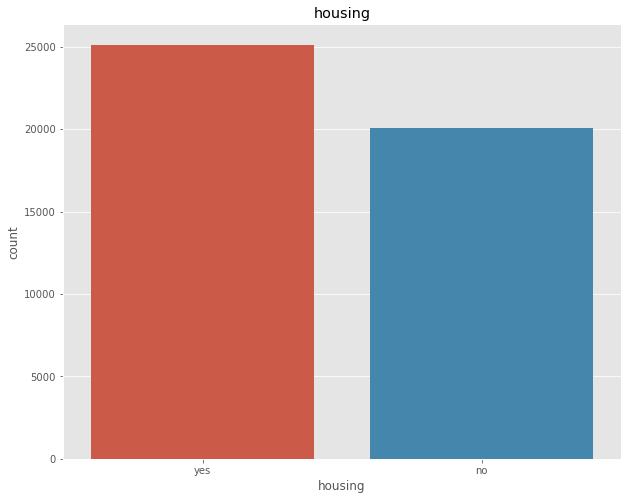

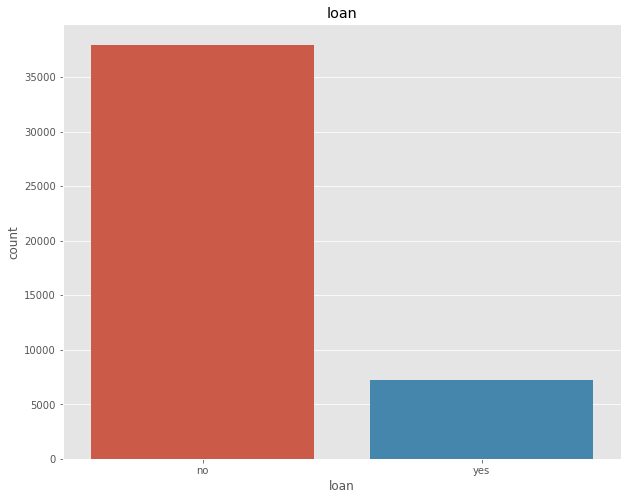

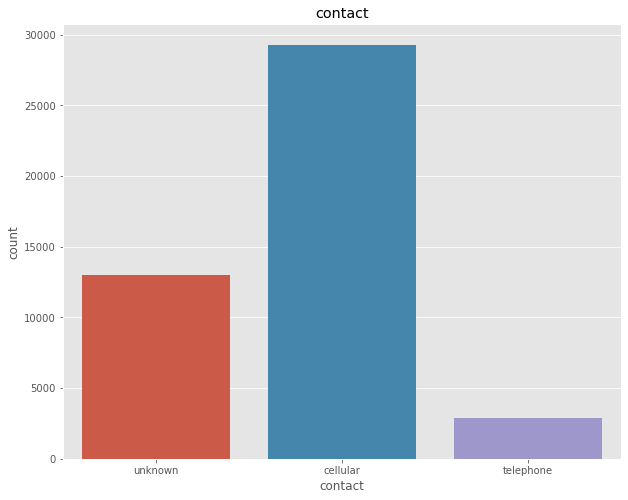

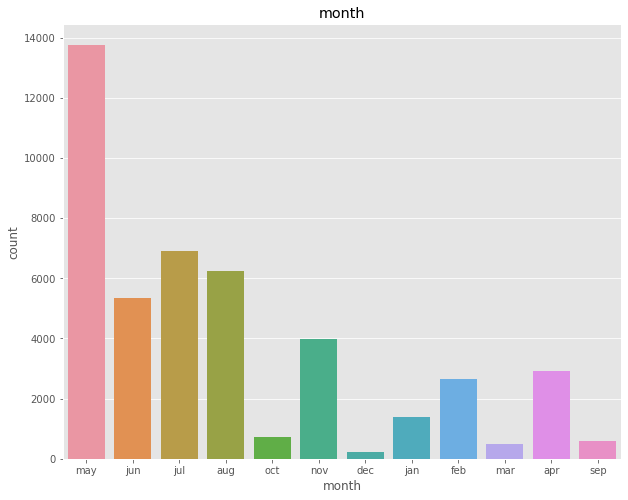

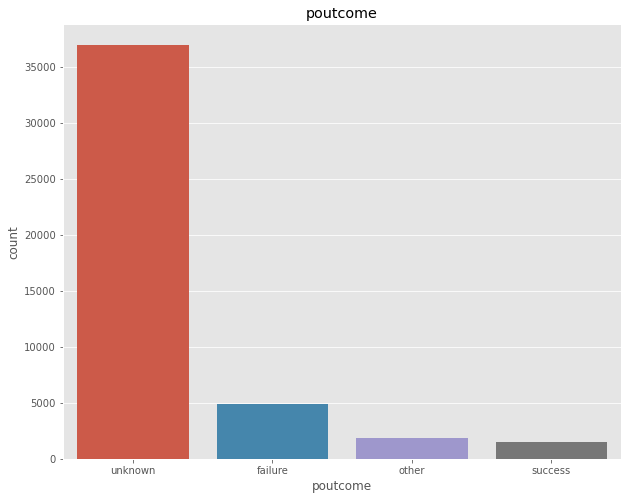

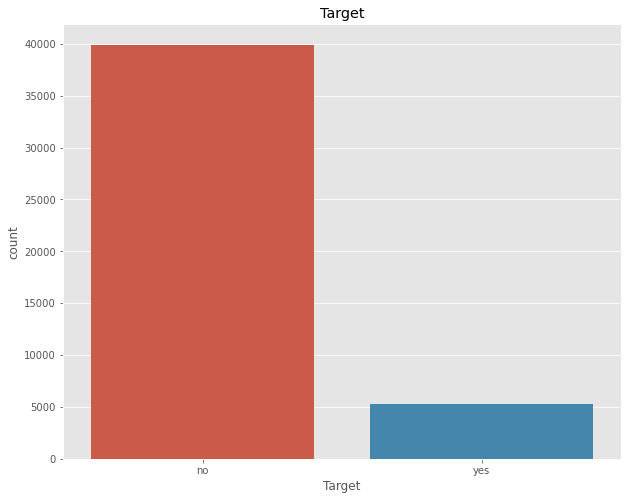

In [31]:
# plots for discrete variables
for i in discrete_var:
    sns.countplot(x=i,data=data)
    plt.title(i)
    plt.show()

From the countplots of the categorical data we can see that there exist a problem of imbalance date in some variables like Default, loan and mor important Target. In the analysis it would be necessary to evaluate whethet some variables wil have the same categories as now or have to aggregate some of them in order to have a better performance and understanding.

In [32]:
# table of frequencies of categorical values
for i in discrete_var:
    aux=pd.crosstab(index=data[i],columns="Count")
    aux['%']=round(aux/aux.sum()*100,2)
    print(aux)
    print()

col_0          Count      %
job                        
admin.          5171  11.44
blue-collar     9732  21.53
entrepreneur    1487   3.29
housemaid       1240   2.74
management      9458  20.92
retired         2264   5.01
self-employed   1579   3.49
services        4154   9.19
student          938   2.07
technician      7597  16.80
unemployed      1303   2.88
unknown          288   0.64

col_0     Count      %
marital               
divorced   5207  11.52
married   27214  60.19
single    12790  28.29

col_0      Count      %
education              
primary     6851  15.15
secondary  23202  51.32
tertiary   13301  29.42
unknown     1857   4.11

col_0    Count     %
default             
no       44396  98.2
yes        815   1.8

col_0    Count      %
housing              
no       20081  44.42
yes      25130  55.58

col_0  Count      %
loan               
no     37967  83.98
yes     7244  16.02

col_0      Count      %
contact                
cellular   29285  64.77
telephone   2906   

From the frequency tables we can see that, for example, for Default variable we only have 1.8% observations with default. This may seem to be not significant for a predictive variable. So, this variable is one of the first candidates to be dropped out in order to improve our model, once we have checked its contribution to the model.

With respect to the other variables we have to analize wether aggregate some of their categories or not. In order to have a simpler model (and avoid overfitting) this could be an alternative.

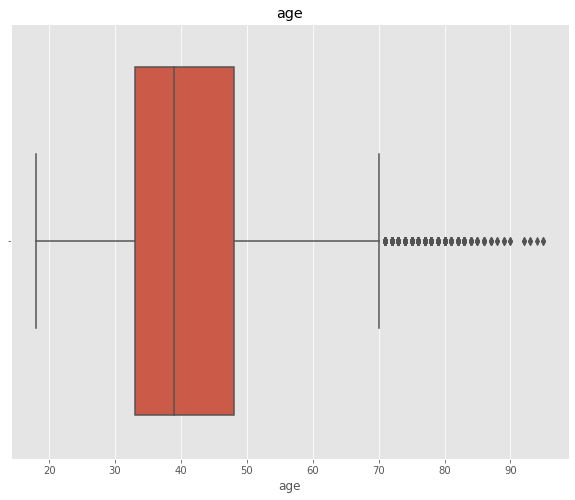

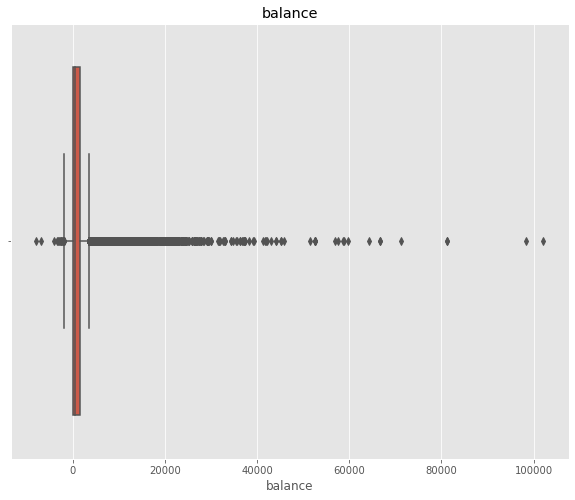

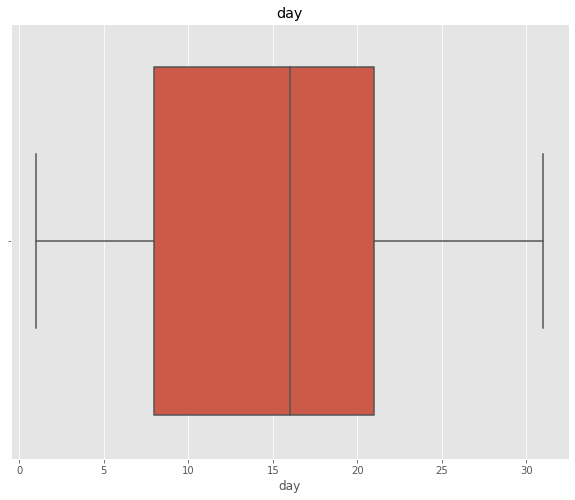

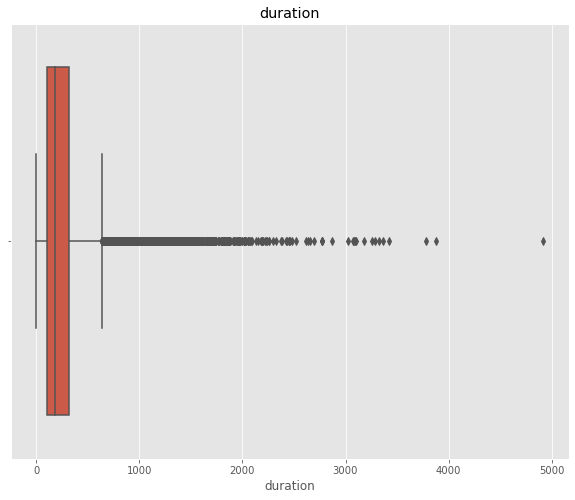

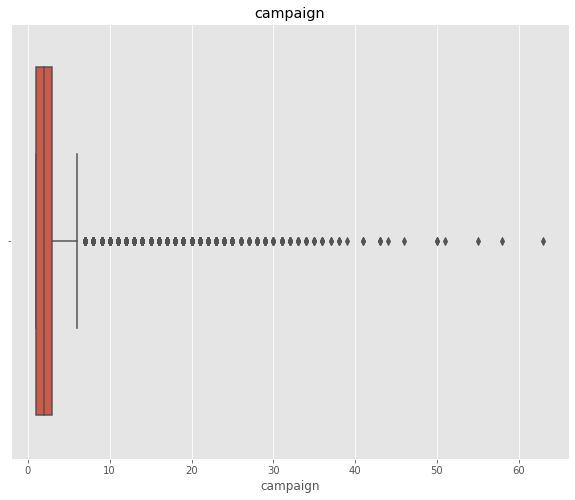

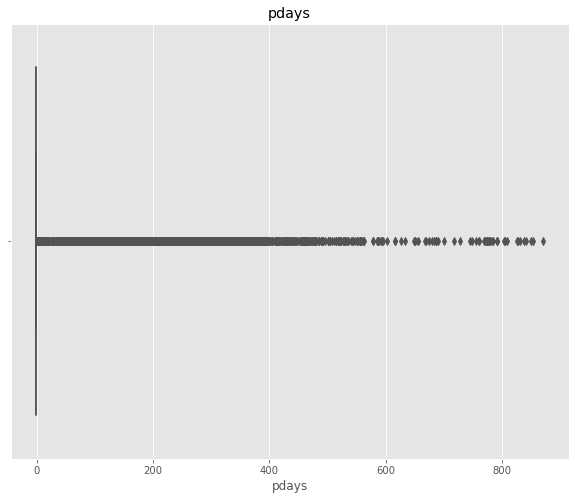

In [33]:
# Finally, we check outliers through boxplots
for i in cont_var:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

From the boxplots of the continuous variables it is clear that exists a lot of outliers in almost all of them, except day. This could be a problem in our model, but in this step I will let them as they are and depending on the results of the first model I could handle this issue through imputating the outliers as a "maximum" or "minimum" unique value, such that the model identifies these outliers as the biggest or lowest value in order to avoid "segmentations" over the outliers. e.g. for duration all values above 1000 seconds would convert to a unique value of 1000, in this way the model could not "segment" the outliers and all of them would be part of one category in a decision step (in the case of a decision tree).

**2. Multivariate analysis(8marks)**
    * Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
    * Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001835
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.020985
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.057161
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.000332
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.038883
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.542073
previous  0.001835  0.020985 -0.057161  0.000332 -0.038883  0.542073  1.000000


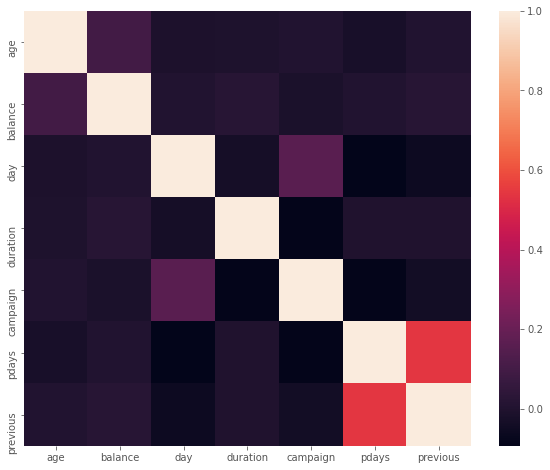

In [34]:
# Correlation between variables
print(data.corr())
sns.heatmap(data.corr())

From above results we can see that there are no strong correlation neither positive nor negative between continuous variables. The biggest correlation is is about .45 the rest of them are near 0. In this sense we can keep all variables.

C:\Users\amiel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\amiel\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


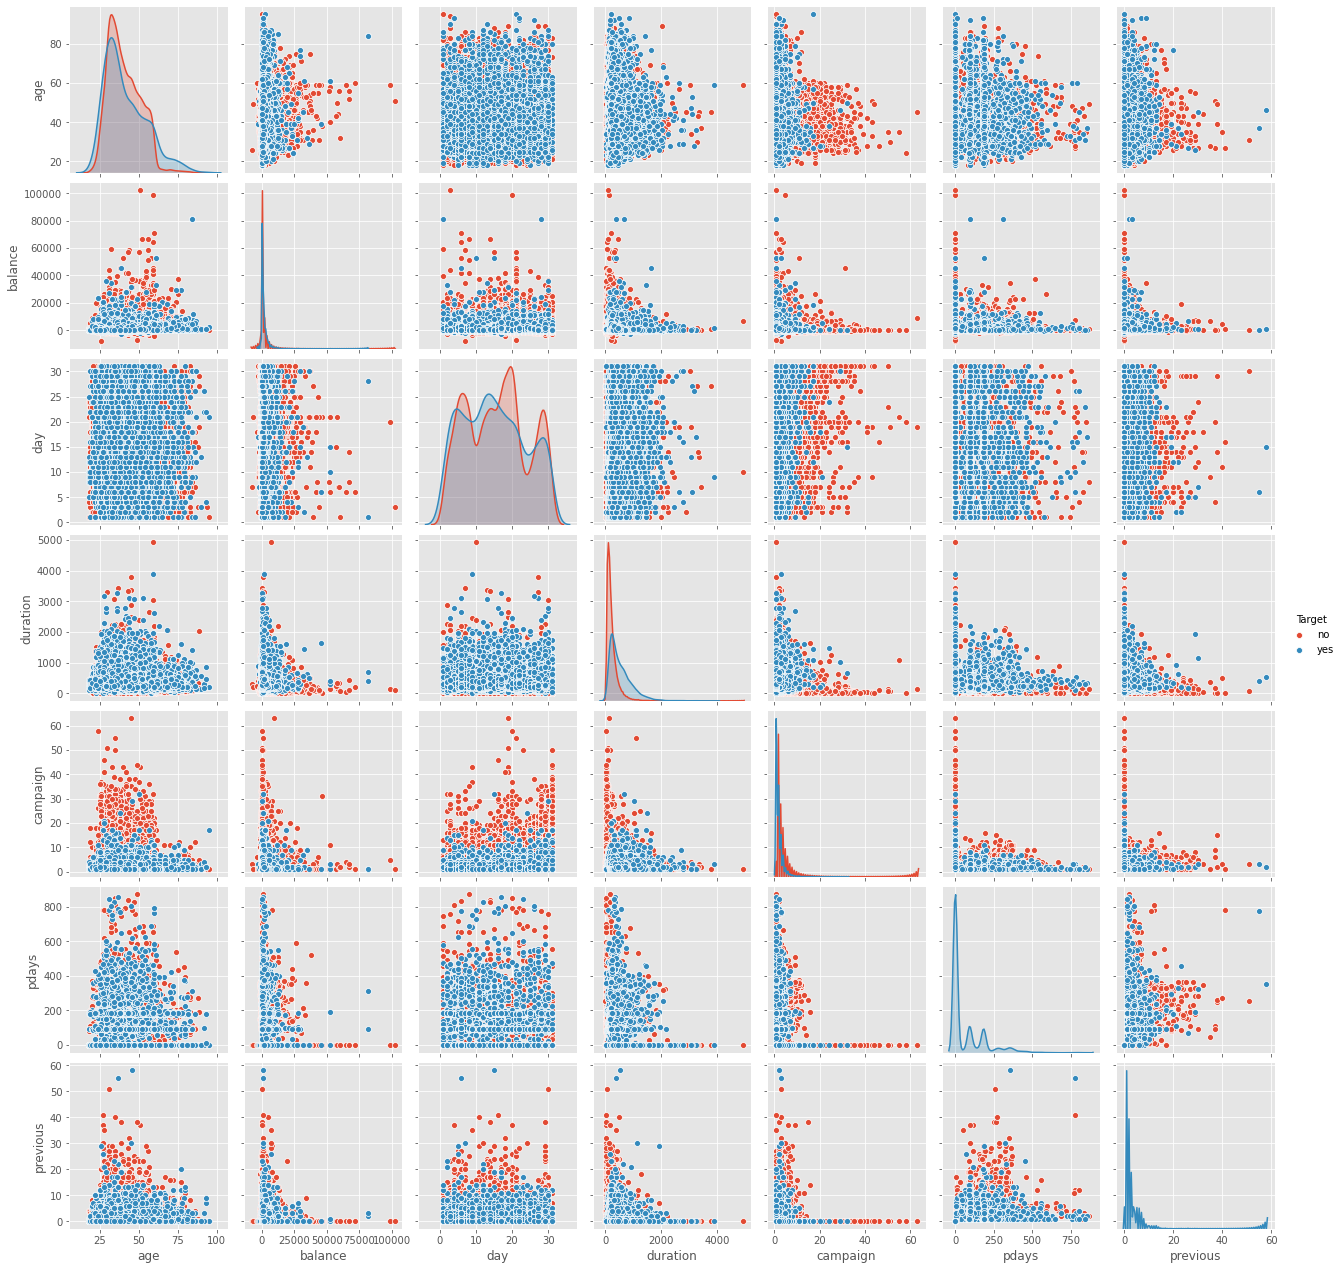

In [35]:
# plotting continuous variables using pairplot and divided by the target variable
sns.pairplot(data,hue="Target")


From the pairplot we can confirm that there is not an evident relationship between variables. Additionally, using as Hue the Target variable we can see that there is not a clear difference in the distributions of the continuous variables from those who suscribed a term deposit and those who did not. These could tell us that the significance or the contibution of these variables to the model would not be high.

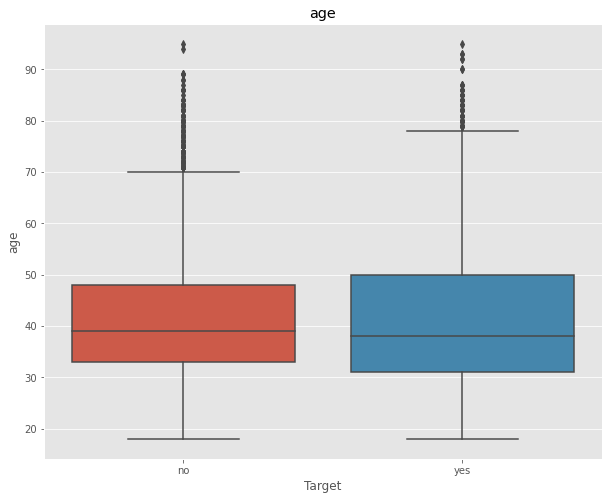

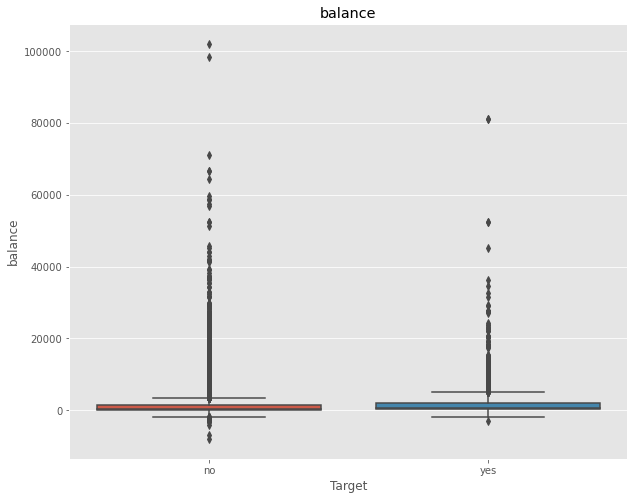

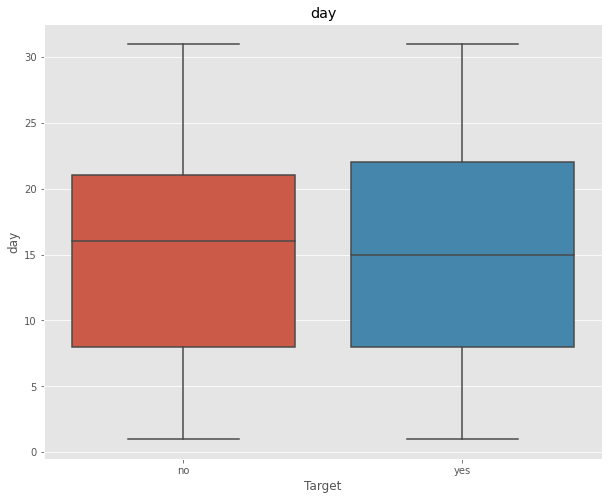

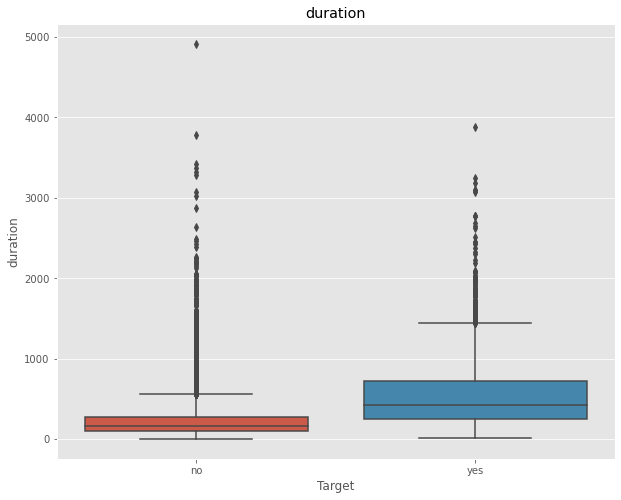

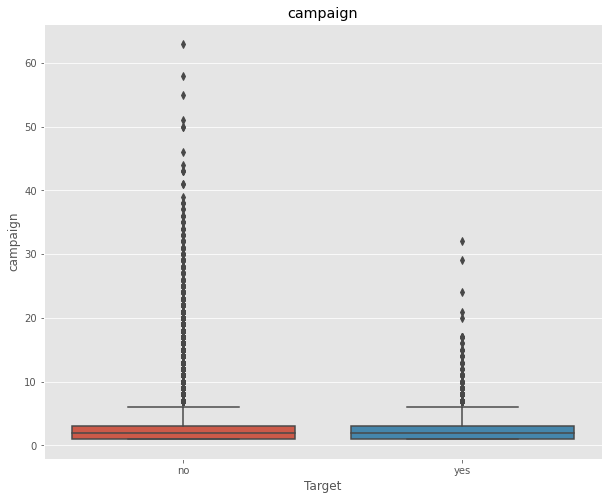

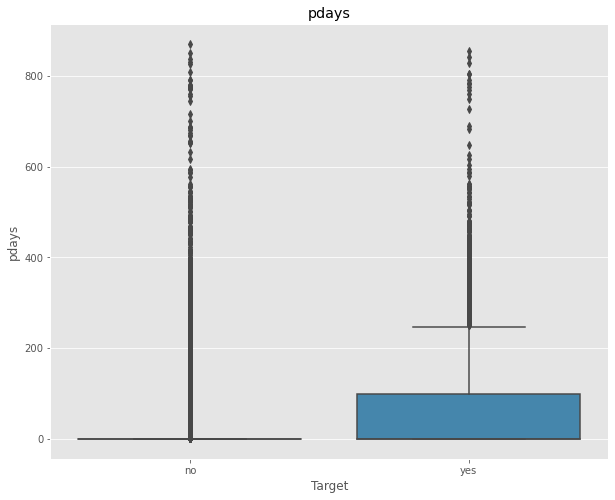

In [36]:
# boxpots of continuous variables divided by Target variable
for i in cont_var:
    sns.boxplot(x=data["Target"] ,y=data[i])
    plt.title(i)
    plt.show()

The above boxplots divided by the Target variable shows us the distribution of each variable for those who suscribed a deposit and who did not. The only distribution that seems to be "different" depending on the Target variable is "duration". This makes sense because if someone is interested on make a deposit, it is more likely to spend more time talking about that.

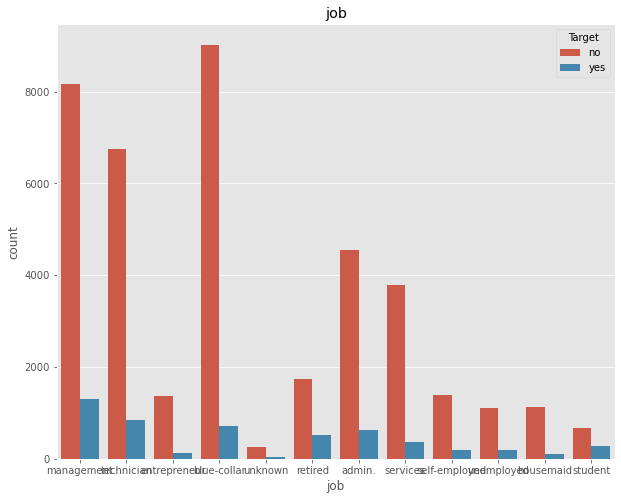

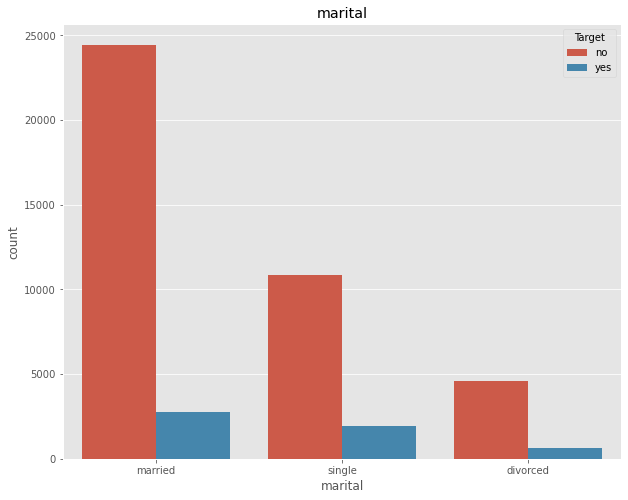

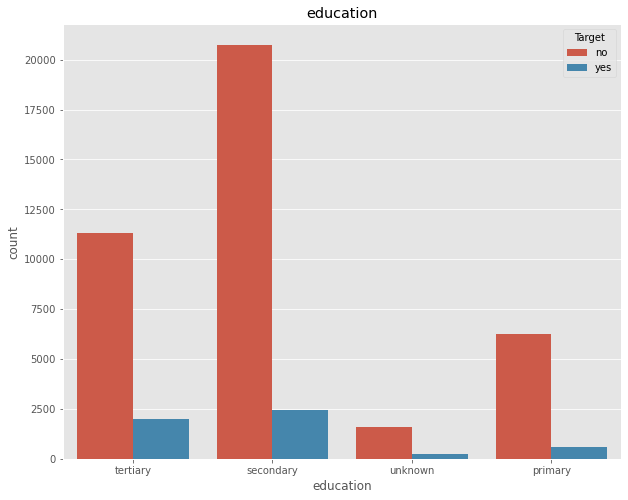

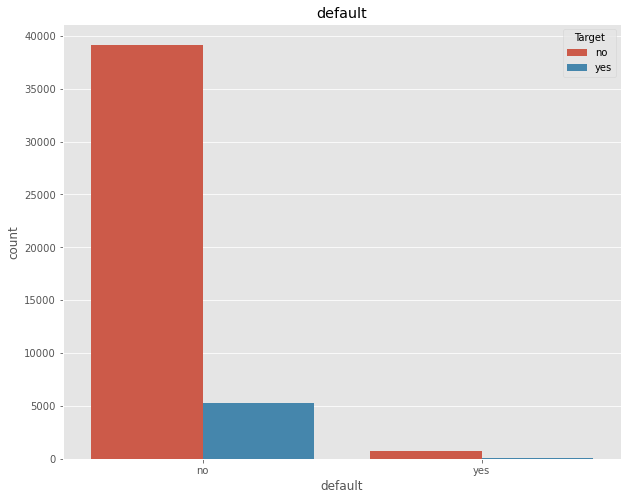

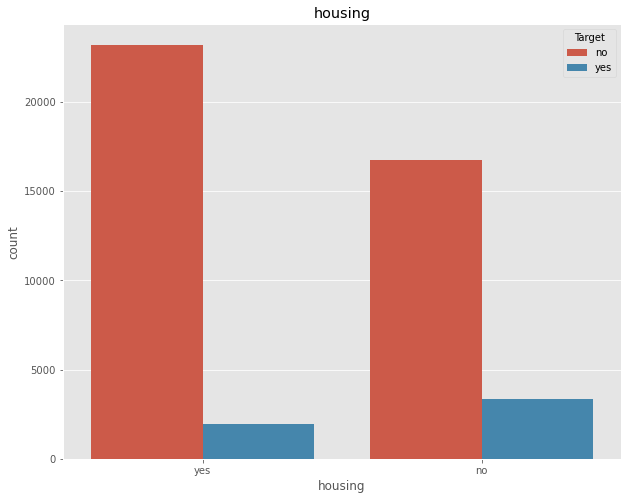

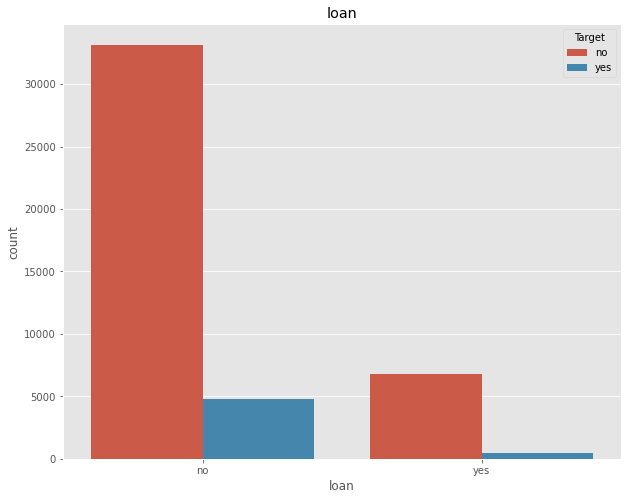

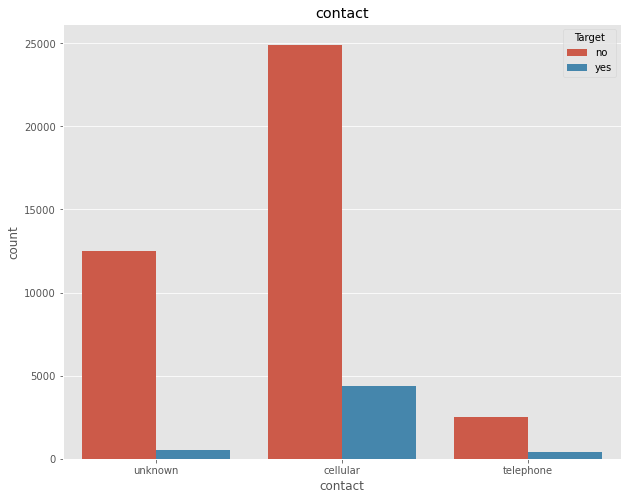

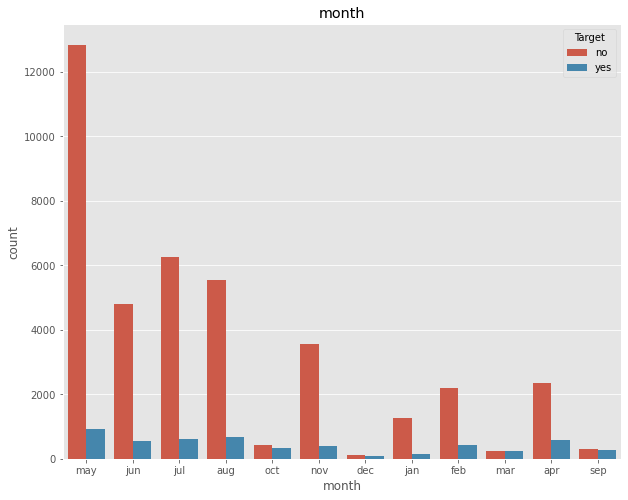

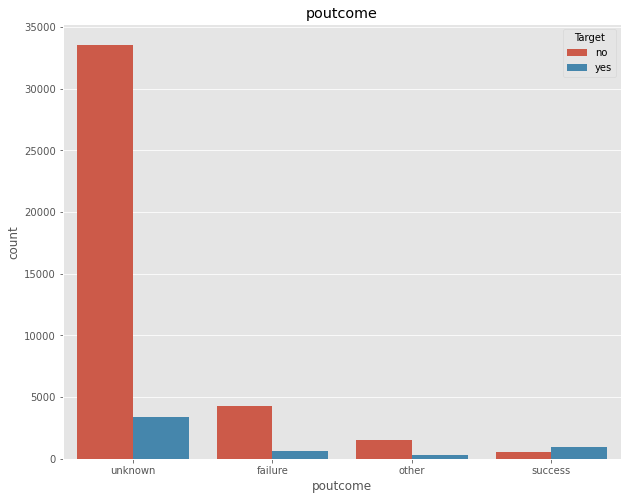

In [37]:
# plots of categorical variables divided by Target variable
aux = discrete_var[discrete_var!="Target"]
for i in aux:
    sns.countplot(x=i,hue="Target",data=data)
    plt.title(i)
    plt.show()

The barplots divided by the target values show us that for some variables there exist some categories that have more people who suscribed a deposit. For example the categories "no default", "no loan" and "contact by celular" have much more people who suscribed a deposit than the other categories of the same variables. However, in most of the variables it is difficult to see a difference between the number of "yes" among their categories.

### Prepare the data for analytics
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready. 
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratioof 70:30

In [38]:
# object type data to categorical
data[discrete_var] = data[discrete_var].astype("category")

# One hot encoding for categorical data
data_model = pd.get_dummies(data,drop_first=True)
data_model.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143,5,261,1,-1,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [39]:
# is it necessary to scale variables?
data_model[cont_var].describe().T


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0


In the dataset we have some variables with a range of values very high, such as balance, duration and pdays. In order to handle this difference I will change the scale of these variables. For duration that is in seconds I will transform it to minutes, for balance that is in units of \\$ I will transform it to thousands of \\$ and for pdays I will transform it to weeks.

In [40]:
# transforming balance and duration, considering numbers with 2 decimals
data_model[["duration"]] = round(data_model[["duration"]]/60,2)
data_model[["balance"]] = round(data_model[["balance"]]/1000,2)
data_model[["pdays"]] = round(data_model[["pdays"]]/7,2)
data_model[cont_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.00,33.00,39.00,48.00,95.00
balance,45211.0,1.362237,3.044789,-8.02,0.07,0.45,1.43,102.13
day,45211.0,15.806419,8.322476,1.00,8.00,16.00,21.00,31.00
duration,45211.0,4.302729,4.292132,0.00,1.72,3.00,5.32,81.97
campaign,45211.0,2.763841,3.098021,1.00,1.00,2.00,3.00,63.00
pdays,45211.0,5.744895,14.303190,-0.14,-0.14,-0.14,-0.14,124.43


Now we can see that there is not so big difference in the scale of the variables. And the only thing I have changed is the interpretation of the units of those three variables.

In [41]:
# creating the training and test sets with 70:30 proportion
x = data_model.drop("Target_yes",axis=1)
y= data_model["Target_yes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)


### Create the ensemble model
1. First create models using **Logistic Regression** and **Decision Tree algorithm**. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model.(10marks)
2. Build the ensemble models(**Bagging and Boosting**) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms)(15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5marks)

In [43]:
# fitting models: Logistic regression and Decision tree

# Logistic regression
logistic = LogisticRegression(solver="liblinear")
logistic.fit(x_train, y_train)

# Decision Tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [48]:
# performing measures

# logistic
print('Score of the training set using Logistic Regression:',logistic.score(x_train,y_train))
print('Score of the testing set using Logistic Regression:',logistic.score(x_test,y_test))
print()

# Decision tree
print('Score of the training set using Logistic Regression:',dTree.score(x_train,y_train))
print('Score of the testing set using Logistic Regression:',dTree.score(x_test,y_test))


Score of the training set using Logistic Regression: 0.9003697032894113
Score of the testing set using Logistic Regression: 0.9057800058979653

Score of the training set using Logistic Regression: 1.0
Score of the testing set using Logistic Regression: 0.8715718077263345


We can see that Logistir Regression perfoms really good. The scores of the training and testing are pretty similar, indicating that there is not neither overfitting nor undefitting. 

On the other hand, as we already know, Decision Tree overfits the data. This because I did not include any pruning technique.

In [53]:
# Prunning the Decision tree
dTree_2 = DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=3)
dTree_2.fit(x_train, y_train)

# Scores of the prunned Tree
print('Score of the training set using Logistic Regression:',dTree_2.score(x_train,y_train))
print('Score of the testing set using Logistic Regression:',dTree_2.score(x_test,y_test))


Score of the training set using Logistic Regression: 0.9003065061459222
Score of the testing set using Logistic Regression: 0.9038631672073135


We can see that the overfitting problem is addressed with the prunned Tree with maximum depth of 3. The score es very close to that of the Logistic Regression. Now let's check the other performance measures with this two models.

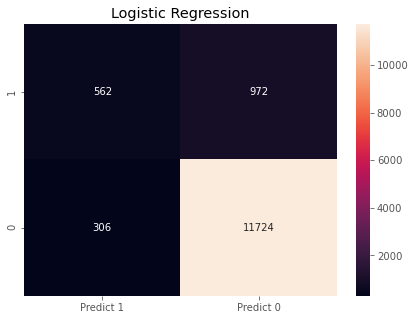

In [60]:
# Confusion matrix

# Logistic
y_predict_lg = logistic.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict_lg, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="d");
plt.title("Logistic Regression");

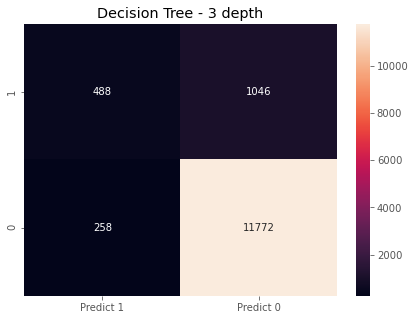

In [65]:
# Confusion matrix

# Dtree
y_predict_dt = dTree_2.predict(x_test)
cm=metrics.confusion_matrix(y_test, y_predict_dt, labels=[1, 0])

df_cm_2 = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_2, annot=True,fmt="d");
plt.title("Decision Tree - 3 depth");

In [97]:
# Metrics of performance

# Accuracy: (TP + FN)/ (TP +TN + FN + FP)
acc = metrics.accuracy_score(y_test,y_predict_lg)*100
acc_dt = metrics.accuracy_score(y_test,y_predict_dt)*100
print("Accuracy of Logistic Regression:",acc)
print("Accuracy of Decision Tree:",acc_dt)
print()

# Precision: (TP)/ (TP + FP)
prec = metrics.precision_score(y_test,y_predict_lg)*100
prec_dt = metrics.precision_score(y_test,y_predict_dt)*100
print("Precision of Logistic Regression:",prec)
print("Precision of Decision Tree:",prec_dt)
print()


# True Positive Rate (Recall or Sensitivity): TP/(TP + FN) Out of all actual positives how many did I classified well
tpr = 100*metrics.recall_score(y_test,y_predict_lg)
tpr_dt = 100*metrics.recall_score(y_test,y_predict_dt)
print("True Positive Rate of Logistic Regression:",tpr)
print("True Positive Rate of Decision Tree:",tpr_dt)
print()

# True Negative rate (Specificity): TN/(TN + FP) Out of all actual negatives how many did I classified well
specificity = df_cm.iloc[1,1]/(df_cm.iloc[1,1] + df_cm.iloc[1,0])*100
specificity_dt = df_cm_2.iloc[1,1]/(df_cm_2.iloc[1,1] + df_cm_2.iloc[1,0])*100
print("True Negative Rate of Logistic Regression:",specificity)
print("True Negative Rate of Decision Tree:",specificity_dt)
print()

# False Negative Rate (1-specificity)
print("False Negative Rate of Logistic Regression:",100-specificity)
print("False Negative Rate of Decision Tree:",100-specificity_dt)
print()

# F1 Score
f1 = metrics.f1_score(y_test,y_predict_lg)*100
f1_dt = metrics.f1_score(y_test,y_predict_dt)*100
print("F1 score of Logistic Regression:",f1)
print("F1 score of Decision Tree:",f1_dt)
print()


print("Logistic Regression confussion matrix")
print(df_cm)
print("Decision Tree confussion matrix")
print(df_cm_2)

Accuracy of Logistic Regression: 90.57800058979653
Accuracy of Decision Tree: 90.38631672073136

Precision of Logistic Regression: 64.74654377880185
Precision of Decision Tree: 65.41554959785523

True Positive Rate of Logistic Regression: 36.63624511082138
True Positive Rate of Decision Tree: 31.8122555410691

True Negative Rate of Logistic Regression: 97.85536159600997
True Negative Rate of Decision Tree: 97.85536159600997

False Negative Rate of Logistic Regression: 2.1446384039900295
False Negative Rate of Decision Tree: 2.1446384039900295

F1 score of Logistic Regression: 46.794338051623654
F1 score of Decision Tree: 42.80701754385965

Logistic Regression confussion matrix
   Predict 1  Predict 0
1        488       1046
0        258      11772
Decision Tree confussion matrix
   Predict 1  Predict 0
1        488       1046
0        258      11772


We can see that some measures are really good in both models. However, in our analysis we are interested on predicting those people who are more likely to suscribe a deposit. i.e. We are interested on the True Positive Rate or recall measure that says out of all True Positives how many did I classified well.

In the recall both models performs poorly. They could be improved by dopping variables that do not apport to the model. However, in I will left them as they are, I will focus on ensemble models in order to get a better model instead of trying to fix these two.

**Bagging and Boosting models**

Here I will fit three models:
* Random Forest which is a kind of Bagging ensemble model
* An Adaptive Boosting model of decision trees 
* A Gradient Boosting model of decision trees

In [90]:
 # Random forest
rf = RandomForestClassifier(max_depth=5,random_state=1) # Using trees with maximum depth of 5
rf.fit(x_train,y_train);

# Adaboost
abcl = AdaBoostClassifier(n_estimators=50, random_state=1) # by default uses decision trees of depth 1 (very simple models)
abcl = abcl.fit(x_train, y_train);

# Gradient Boost
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train);


In [91]:
# Scores
print('Score of the training set using Random Forest:',rf.score(x_train,y_train))
print('Score of the testing set using Random Forest:',rf.score(x_test,y_test))
print()
print('Score of the training set using AdaBoost:',abcl.score(x_train,y_train))
print('Score of the testing set using AdaBoost:',abcl.score(x_test,y_test))
print()
print('Score of the training set using Gradient Boosting:',gbcl.score(x_train,y_train))
print('Score of the testing set using Gradient Boosting:',gbcl.score(x_test,y_test))
print()

Score of the training set using Random Forest: 0.8942395803709672
Score of the testing set using Random Forest: 0.8956797404895311

Score of the training set using AdaBoost: 0.8999273232849875
Score of the testing set using AdaBoost: 0.9039368917723385

Score of the training set using Gradient Boosting: 0.9053938761967959
Score of the testing set using Gradient Boosting: 0.9081391919787674



From the scores we can see that there are no overfitting in any model. All the models seem to perform very well. Let's check the rest of measures.

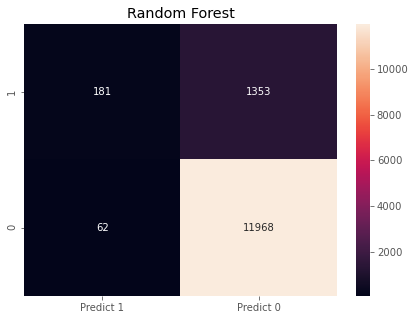

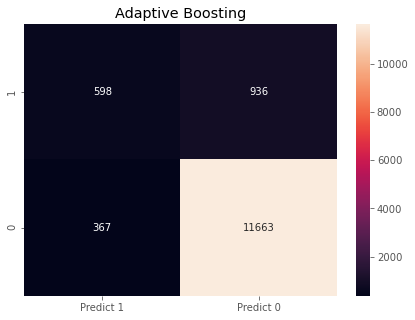

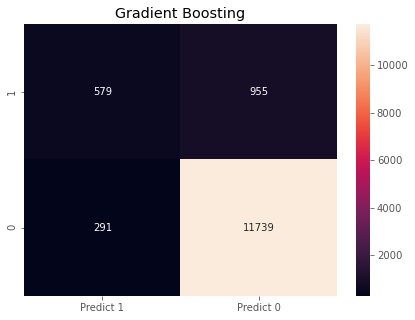

In [92]:
# Confusion matrix

# Random Forest
y_predict_rf = rf.predict(x_test)

# AdaBoost
y_predict_abcl = abcl.predict(x_test)

# Gradient Boost
y_predict_gbcl = gbcl.predict(x_test)

cm_rf=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
cm_abcl=metrics.confusion_matrix(y_test, y_predict_abcl, labels=[1, 0])
cm_gbcl=metrics.confusion_matrix(y_test, y_predict_gbcl, labels=[1, 0])

df_cm_rf = pd.DataFrame(cm_rf, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
df_cm_abcl = pd.DataFrame(cm_abcl, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
df_cm_gbcl = pd.DataFrame(cm_gbcl, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rf, annot=True,fmt="d");
plt.title("Random Forest");
plt.show();

plt.figure(figsize = (7,5))
sns.heatmap(df_cm_abcl, annot=True,fmt="d");
plt.title("Adaptive Boosting");
plt.show();

plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gbcl, annot=True,fmt="d");
plt.title("Gradient Boosting");
plt.show();

We can see that Random Forest does not predict well the True positives which are those who are important in our analysis. Between AdaBoost and Gradient Boosting there is no such a big difference but AdaBoost predict more positives in a correct way than Gradient Boosting. 

In [98]:
# Metrics of performance

# Accuracy: (TP + FN)/ (TP +TN + FN + FP)
acc_rf = metrics.accuracy_score(y_test,y_predict_rf)*100
acc_abcl = metrics.accuracy_score(y_test,y_predict_abcl)*100
acc_gbcl = metrics.accuracy_score(y_test,y_predict_gbcl)*100
print("Accuracy of Random Forest:",acc_rf)
print("Accuracy of AdaBoost:",acc_abcl)
print("Accuracy of Gradient Boosting:",acc_gbcl)
print()

# Precision: (TP)/ (TP + FP)
prec_rf = metrics.precision_score(y_test,y_predict_rf)*100
prec_abcl = metrics.precision_score(y_test,y_predict_abcl)*100
prec_gbcl = metrics.precision_score(y_test,y_predict_gbcl)*100
print("Precision of Random Forest:",prec_rf)
print("Precision of AdaBoost:",prec_abcl)
print("Precision of Gradient Boosting:",prec_gbcl)
print()


# True Positive Rate (Recall or Sensitivity): TP/(TP + FN) Out of all actual positives how many did I classified well
tpr_rf = 100*metrics.recall_score(y_test,y_predict_rf)
tpr_abcl = 100*metrics.recall_score(y_test,y_predict_abcl)
tpr_gbcl = 100*metrics.recall_score(y_test,y_predict_gbcl)
print("True Positive Rate of Random Forest:",tpr_rf)
print("True Positive Rate of AdaBoost:",tpr_abcl)
print("True Positive Rate of Gradient Boosting:",tpr_gbcl)
print()

# True Negative rate (Specificity): TN/(TN + FP) Out of all actual negatives how many did I classified well
specificity_rf = df_cm_rf.iloc[1,1]/(df_cm_rf.iloc[1,1] + df_cm_rf.iloc[1,0])*100
specificity_abcl = df_cm_abcl.iloc[1,1]/(df_cm_abcl.iloc[1,1] + df_cm_abcl.iloc[1,0])*100
specificity_gbcl = df_cm_gbcl.iloc[1,1]/(df_cm_gbcl.iloc[1,1] + df_cm_gbcl.iloc[1,0])*100
print("True Negative Rate of Random Forest:",specificity_rf)
print("True Negative Rate of AdaBoost:",specificity_abcl)
print("True Negative Rate of Gradient Boosting:",specificity_gbcl)
print()

# False Negative Rate (1-specificity)
print("False Negative Rate of Random Forest:",100-specificity_rf)
print("False Negative Rate of AdaBoost:",100-specificity_abcl)
print("False Negative Rate of Gradient Boosting:",100-specificity_gbcl)
print()

# F1 Score
f1_rf = metrics.f1_score(y_test,y_predict_rf)*100
f1_abcl = metrics.f1_score(y_test,y_predict_abcl)*100
f1_gbcl = metrics.f1_score(y_test,y_predict_gbcl)*100
print("F1 score of Random Forest:",f1_rf)
print("F1 score of AdaBoost:",f1_abcl)
print("F1 score of Gradient Boosting:",f1_gbcl)
print()


print("Random Forest confussion matrix")
print(df_cm_rf)
print("AdaBoost confussion matrix")
print(df_cm_abcl)
print("Gradient Boosting confussion matrix")
print(df_cm_gbcl)

Accuracy of Random Forest: 89.56797404895312
Accuracy of AdaBoost: 90.39368917723385
Accuracy of Gradient Boosting: 90.81391919787674

Precision of Random Forest: 74.48559670781893
Precision of AdaBoost: 61.968911917098445
Precision of Gradient Boosting: 66.55172413793103

True Positive Rate of Random Forest: 11.799217731421122
True Positive Rate of AdaBoost: 38.983050847457626
True Positive Rate of Gradient Boosting: 37.74445893089961

True Negative Rate of Random Forest: 99.48462177888612
True Negative Rate of AdaBoost: 96.94929343308397
True Negative Rate of Gradient Boosting: 97.58104738154614

False Negative Rate of Random Forest: 0.5153782211138775
False Negative Rate of AdaBoost: 3.050706566916034
False Negative Rate of Gradient Boosting: 2.418952618453858

F1 score of Random Forest: 20.371412492965675
F1 score of AdaBoost: 47.85914365746299
F1 score of Gradient Boosting: 48.16971713810317

Random Forest confussion matrix
   Predict 1  Predict 0
1        181       1353
0        

Now lets check all measures of the 5 models at a glance.

In [100]:
d = {'Measure': ["Accuracy","Precision","TPR","F1"], 'Logistic Regression': [acc,prec,tpr,f1],
     "Decision Tree":[acc_dt,prec_dt,tpr_dt,f1_dt],
     "Random Forest":[acc_rf,prec_rf,tpr_rf,f1_rf],
     "AdaBoost":[acc_abcl,prec_abcl,tpr_abcl,f1_abcl],
     "Gradient Boost":[acc_gbcl,prec_gbcl,tpr_gbcl,f1_gbcl]
    }
summary_table = pd.DataFrame(d)
summary_table

,Measure,Logistic Regression,Decision Tree,Random Forest,AdaBoost,Gradient Boost
0,Accuracy,90.578001,90.386317,89.567974,90.393689,90.813919
1,Precision,64.746544,65.415550,74.485597,61.968912,66.551724
2,TPR,36.636245,31.812256,11.799218,38.983051,37.744459
3,F1,46.794338,42.807018,20.371412,47.859144,48.169717


From the above results and considering the context of our analysis we can see that AdaBoost is the best model of the 5 considered here. This, because that its True Positive Rate is the highest and is the measure that we are interested on.

In [138]:
pd.DataFrame([logistic.coef_[0],dTree_2.feature_importances_,
              rf.feature_importances_,abcl.feature_importances_,
              gbcl.feature_importances_],columns=x_train.columns,
             index=["Logistic Regression","Decision Tree","Random Forest","AdaBoost","Gradient Boosting"]).T


,Logistic Regression,Decision Tree,Random Forest,AdaBoost,Gradient Boosting
age,-0.000869,0.000000,0.046203,0.06,0.031878
balance,0.010129,0.000000,0.012572,0.02,0.006435
day,0.009996,0.000000,0.009200,0.08,0.010183
duration,0.249304,0.622019,0.356277,0.34,0.489653
campaign,-0.093727,0.000000,0.007270,0.04,0.006468
pdays,-0.000478,0.000000,0.056590,0.04,0.029052
previous,0.036162,0.000000,0.045319,0.02,0.000000
job_blue-collar,-0.326373,0.000000,0.002877,0.00,0.000000
job_entrepreneur,-0.436640,0.000000,0.000427,0.00,0.000803
job_housemaid,-0.392690,0.000000,0.000417,0.00,0.000000


From the above table we can se the "importance" of each variable for each model. The less important variables for most of the models are: default_yes, some categories of job. Based on This we can fit our last model again without these variables and see its performance.

In [157]:
x = data_model.drop(["Target_yes","default_yes",'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],axis=1)
y= data_model["Target_yes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)


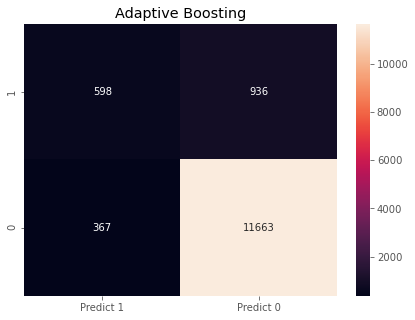

,Measure,AdaBoost first model,AdaBoost last model
0,Accuracy,90.393689,90.393689
1,Precision,61.968912,61.968912
2,TPR,38.983051,38.983051
3,F1,47.859144,47.859144


In [158]:
# Adaboost
abcl_2 = AdaBoostClassifier(n_estimators=50, random_state=1) # by default uses decision trees of depth 1 (very simple models)
abcl_2 = abcl_2.fit(x_train, y_train);

# AdaBoost
y_predict_abcl_2 = abcl_2.predict(x_test)
cm_abcl_2=metrics.confusion_matrix(y_test, y_predict_abcl_2, labels=[1, 0])

df_cm_abcl_2 = pd.DataFrame(cm_abcl_2, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm_abcl_2, annot=True,fmt="d");
plt.title("Adaptive Boosting");
plt.show();


acc_abcl_2 = metrics.accuracy_score(y_test,y_predict_abcl_2)*100
tpr_abcl_2 = 100*metrics.recall_score(y_test,y_predict_abcl_2)
prec_abcl_2 = metrics.precision_score(y_test,y_predict_abcl_2)*100
f1_abcl_2 = metrics.f1_score(y_test,y_predict_abcl_2)*100

d = {'Measure': ["Accuracy","Precision","TPR","F1"], 'AdaBoost first model': [acc_abcl,prec_abcl,tpr_abcl,f1_abcl],
     "AdaBoost last model":[acc_abcl_2,prec_abcl_2,tpr_abcl_2,f1_abcl_2],
    }
summary_table = pd.DataFrame(d)
summary_table


Without these two variables (job and default) we have the same results with less variables.

In [177]:
importance = pd.DataFrame([abcl_2.feature_importances_], columns=x_train.columns,
             index=["AdaBoost"]).T
importance.sort_values("AdaBoost", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
importance[importance.AdaBoost>0]

,AdaBoost
duration,0.34
day,0.08
age,0.06
poutcome_success,0.04
housing_yes,0.04
month_sep,0.04
pdays,0.04
campaign,0.04
poutcome_other,0.02
month_feb,0.02


Finally, we can see which variables are more important for the model.These variables could help the marketing team in order to improve their campaigns and get more people suscribing deposit. For this purpose it is important to have a long call with the client, and in the last days of the month. Also, older people is more likely to suscribe a deposit.